<h4>Explore how weather affects GDP in agriculturally based economies</h4>

In [1]:
#import dependencies
import requests 
import json
from pprint import pprint
import os
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress


In [2]:
# Read in Merged GDP, Weather, and Temperature Data
path_weather_temperature = os.path.join("Resources", "Merge_data_2005-2015.csv")
df = pd.read_csv(path_weather_temperature)
df["ISO3"] = df["ISO3"].astype("string")
df.head()

Unnamed: 0 ISO3      Country  Year  Temp_Farenheit  Rainfall_mm  \
0           0  AFG  Afghanistan  2005       56.087945    29.609967   
1           1  AFG  Afghanistan  2006       57.501470    27.120458   
2           2  AFG  Afghanistan  2007       56.320054    25.329681   
3           3  AFG  Afghanistan  2008       56.755070    21.505365   
4           4  AFG  Afghanistan  2009       56.807912    31.106477   

            GDP        GDP_md     GDP_bd  
0  6.209138e+09   6209.137625   6.209138  
1  6.971286e+09   6971.285595   6.971286  
2  9.747880e+09   9747.879532   9.747880  
3  1.010923e+10  10109.225814  10.109226  
4  1.243909e+10  12439.087077  12.439087

In [3]:
# Filter data showing only top 10 agriculturally based economies 
agricultural_ISO3 = ["SLE", "TCD", "GNB", "COM", "CAF", "MLI", "NER", "SDN", "BDI", "ETH"]
agricultural_df = df[df.ISO3.isin(agricultural_ISO3)]


agricultural_df.head(100)



Unnamed: 0 ISO3       Country  Year  Temp_Farenheit  Rainfall_mm  \
297          297  BDI       Burundi  2005       70.857170    89.670074   
298          298  BDI       Burundi  2006       69.521495   113.152843   
299          299  BDI       Burundi  2007       69.279200   108.497519   
300          300  BDI       Burundi  2008       69.045200    99.705089   
301          301  BDI       Burundi  2009       70.191065   103.759156   
...          ...  ...           ...   ...             ...          ...   
1657        1690  SLE  Sierra Leone  2012       79.433570   201.897354   
1658        1691  SLE  Sierra Leone  2013       79.832525   207.018927   
1659        1692  SLE  Sierra Leone  2014       79.657835   186.648337   
1660        1693  SLE  Sierra Leone  2015       79.951400   217.161513   
1771        1826  SDN         Sudan  2005       82.696910    21.636070   

               GDP        GDP_md     GDP_bd  
297   1.117113e+09   1117.113046   1.117113  
298   1.273375e+09   1273.375020   1.273375  
299   1.356199e+09   1356.199365   1.356199  
300   1.611836e+09   1611.835902   1.611836  
301   1.781455e+09   1781.455092   1.781455  
...            ...           ...        ...  
1657  3.801863e+09   3801.862611   3.801863  
1658  4.920343e+09   4920.343195   4.920343  
1659  5.015158e+09   5015.157816   5.015158  
1660  4.218724e+09   4218.723875   4.218724  
1771  2.652454e+10  26524.538566  26.524539  

[100 rows x 9 columns]

Text(0, 0.5, 'GDP(Mill,$)')

<Figure size 1080x360 with 0 Axes>

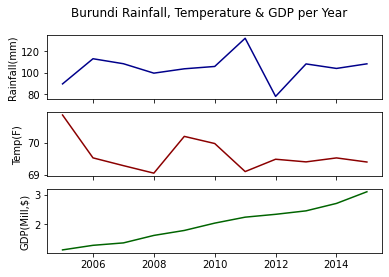

In [5]:
# Create Burundi charts for Temperature & Precipitations vs GDP
burundi_df = agricultural_df[agricultural_df["ISO3"] == "BDI"]
x_values = burundi_df["Year"]
y1_values = burundi_df["Rainfall_mm"]
y2_values = burundi_df["Temp_Farenheit"]
y3_values = burundi_df["GDP_bd"]

fig = plt.figure(figsize=(15,5))


fig, axs = plt.subplots(3, sharex=True, sharey=False)
fig.suptitle('Burundi Precipitation, Temperature & GDP per Year')
axs[0].plot(x_values, y1_values, color='DarkBlue')
axs[1].plot(x_values, y2_values, color='DarkRed')
axs[2].plot(x_values, y3_values, color='DarkGreen')
axs[0].set_ylabel('Prec(mm)')
axs[1].set_ylabel('Temp(F)')
axs[2].set_ylabel('GDP(bil,$)')



Text(0, 0.5, 'GDP(bil,$)')

<Figure size 1080x360 with 0 Axes>

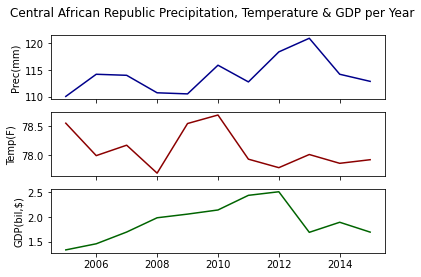

In [6]:
# Create Central African Republic charts for Temperature & Precipitations vs GDP
cen_af_rep_df = agricultural_df[agricultural_df["ISO3"] == "CAF"]
x_values = cen_af_rep_df["Year"]
y1_values = cen_af_rep_df["Rainfall_mm"]
y2_values = cen_af_rep_df["Temp_Farenheit"]
y3_values = cen_af_rep_df["GDP_bd"]

fig = plt.figure(figsize=(15,5))


fig, axs = plt.subplots(3, sharex=True, sharey=False)
fig.suptitle('Central African Republic Precipitation, Temperature & GDP per Year')
axs[0].plot(x_values, y1_values, color='DarkBlue')
axs[1].plot(x_values, y2_values, color='DarkRed')
axs[2].plot(x_values, y3_values, color='DarkGreen')
axs[0].set_ylabel('Prec(mm)')
axs[1].set_ylabel('Temp(F)')
axs[2].set_ylabel('GDP(bil,$)')

Text(0, 0.5, 'GDP(bil,$)')

<Figure size 1080x360 with 0 Axes>

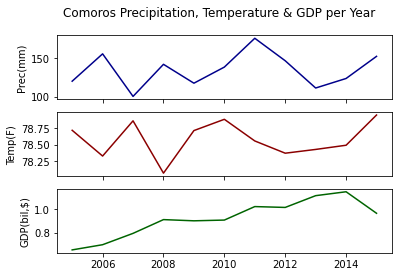

In [7]:
# Create Comoros charts for Temperature & Precipitations vs GDP
comoros_df = agricultural_df[agricultural_df["ISO3"] == "COM"]
x_values = comoros_df["Year"]
y1_values = comoros_df["Rainfall_mm"]
y2_values = comoros_df["Temp_Farenheit"]
y3_values = comoros_df["GDP_bd"]

fig = plt.figure(figsize=(15,5))


fig, axs = plt.subplots(3, sharex=True, sharey=False)
fig.suptitle('Comoros Precipitation, Temperature & GDP per Year')
axs[0].plot(x_values, y1_values, color='DarkBlue')
axs[1].plot(x_values, y2_values, color='DarkRed')
axs[2].plot(x_values, y3_values, color='DarkGreen')
axs[0].set_ylabel('Prec(mm)')
axs[1].set_ylabel('Temp(F)')
axs[2].set_ylabel('GDP(bil,$)')

Text(0, 0.5, 'GDP(bil,$)')

<Figure size 1080x360 with 0 Axes>

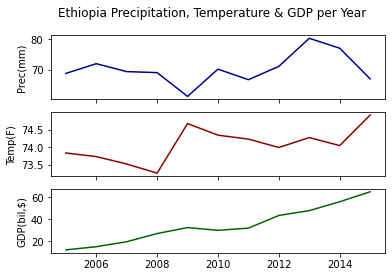

In [8]:
# Create Ethiopia charts for Temperature & Precipitations vs GDP
ethiopia_df = agricultural_df[agricultural_df["ISO3"] == "ETH"]
x_values = ethiopia_df["Year"]
y1_values = ethiopia_df["Rainfall_mm"]
y2_values = ethiopia_df["Temp_Farenheit"]
y3_values = ethiopia_df["GDP_bd"]

fig = plt.figure(figsize=(15,5))


fig, axs = plt.subplots(3, sharex=True, sharey=False)
fig.suptitle('Ethiopia Precipitation, Temperature & GDP per Year')
axs[0].plot(x_values, y1_values, color='DarkBlue')
axs[1].plot(x_values, y2_values, color='DarkRed')
axs[2].plot(x_values, y3_values, color='DarkGreen')
axs[0].set_ylabel('Prec(mm)')
axs[1].set_ylabel('Temp(F)')
axs[2].set_ylabel('GDP(bil,$)')

Text(0, 0.5, 'GDP(bil,$)')

<Figure size 1080x360 with 0 Axes>

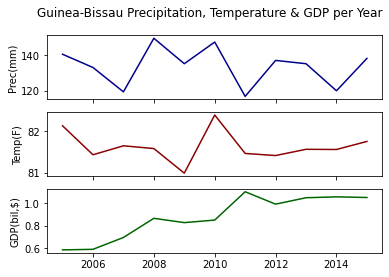

In [9]:
# Create Guinea-Bissau charts for Temperature & Precipitations vs GDP
guinea_bissau_df = agricultural_df[agricultural_df["ISO3"] == "GNB"]
x_values = guinea_bissau_df["Year"]
y1_values = guinea_bissau_df["Rainfall_mm"]
y2_values = guinea_bissau_df["Temp_Farenheit"]
y3_values = guinea_bissau_df["GDP_bd"]

fig = plt.figure(figsize=(15,5))


fig, axs = plt.subplots(3, sharex=True, sharey=False)
fig.suptitle('Guinea-Bissau Precipitation, Temperature & GDP per Year')
axs[0].plot(x_values, y1_values, color='DarkBlue')
axs[1].plot(x_values, y2_values, color='DarkRed')
axs[2].plot(x_values, y3_values, color='DarkGreen')
axs[0].set_ylabel('Prec(mm)')
axs[1].set_ylabel('Temp(F)')
axs[2].set_ylabel('GDP(bil,$)')

Text(0, 0.5, 'GDP(bil,$)')

<Figure size 1080x360 with 0 Axes>

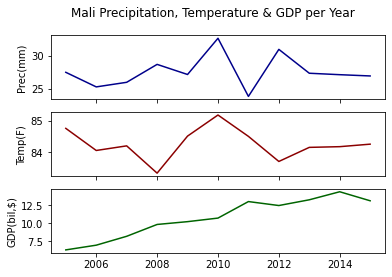

In [10]:
# Create Mali charts for Temperature & Precipitations vs GDP
mali_df = agricultural_df[agricultural_df["ISO3"] == "MLI"]
x_values = mali_df["Year"]
y1_values = mali_df["Rainfall_mm"]
y2_values = mali_df["Temp_Farenheit"]
y3_values = mali_df["GDP_bd"]

fig = plt.figure(figsize=(15,5))


fig, axs = plt.subplots(3, sharex=True, sharey=False)
fig.suptitle('Mali Precipitation, Temperature & GDP per Year')
axs[0].plot(x_values, y1_values, color='DarkBlue')
axs[1].plot(x_values, y2_values, color='DarkRed')
axs[2].plot(x_values, y3_values, color='DarkGreen')
axs[0].set_ylabel('Prec(mm)')
axs[1].set_ylabel('Temp(F)')
axs[2].set_ylabel('GDP(bil,$)')

Text(0, 0.5, 'GDP(bil,$)')

<Figure size 1080x360 with 0 Axes>

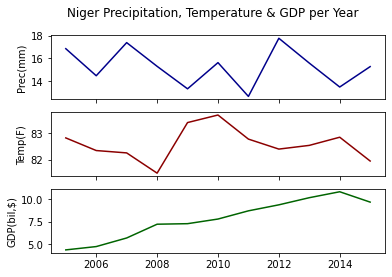

In [11]:
# Create Niger charts for Temperature & Precipitations vs GDP
niger_df = agricultural_df[agricultural_df["ISO3"] == "NER"]
x_values = niger_df["Year"]
y1_values = niger_df["Rainfall_mm"]
y2_values = niger_df["Temp_Farenheit"]
y3_values = niger_df["GDP_bd"]

fig = plt.figure(figsize=(15,5))


fig, axs = plt.subplots(3, sharex=True, sharey=False)
fig.suptitle('Niger Precipitation, Temperature & GDP per Year')
axs[0].plot(x_values, y1_values, color='DarkBlue')
axs[1].plot(x_values, y2_values, color='DarkRed')
axs[2].plot(x_values, y3_values, color='DarkGreen')
axs[0].set_ylabel('Prec(mm)')
axs[1].set_ylabel('Temp(F)')
axs[2].set_ylabel('GDP(bil,$)')

Text(0, 0.5, 'GDP(bil,$)')

<Figure size 1080x360 with 0 Axes>

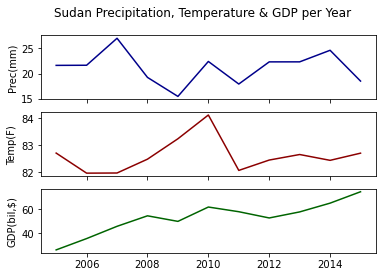

In [12]:
# Create Sudan charts for Temperature & Precipitations vs GDP
sudan_df = agricultural_df[agricultural_df["ISO3"] == "SDN"]
x_values = sudan_df["Year"]
y1_values = sudan_df["Rainfall_mm"]
y2_values = sudan_df["Temp_Farenheit"]
y3_values = sudan_df["GDP_bd"]

fig = plt.figure(figsize=(15,5))


fig, axs = plt.subplots(3, sharex=True, sharey=False)
fig.suptitle('Sudan Precipitation, Temperature & GDP per Year')
axs[0].plot(x_values, y1_values, color='DarkBlue')
axs[1].plot(x_values, y2_values, color='DarkRed')
axs[2].plot(x_values, y3_values, color='DarkGreen')
axs[0].set_ylabel('Prec(mm)')
axs[1].set_ylabel('Temp(F)')
axs[2].set_ylabel('GDP(bil,$)')

Text(0, 0.5, 'GDP(bil,$)')

<Figure size 1080x360 with 0 Axes>

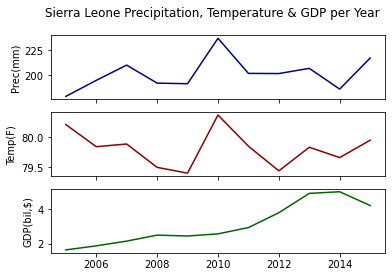

In [13]:
# Create Sierra Leone charts for Temperature & Precipitations vs GDP
sierra_leone_df = agricultural_df[agricultural_df["ISO3"] == "SLE"]
x_values = sierra_leone_df["Year"]
y1_values = sierra_leone_df["Rainfall_mm"]
y2_values = sierra_leone_df["Temp_Farenheit"]
y3_values = sierra_leone_df["GDP_bd"]

fig = plt.figure(figsize=(15,5))


fig, axs = plt.subplots(3, sharex=True, sharey=False)
fig.suptitle('Sierra Leone Precipitation, Temperature & GDP per Year')
axs[0].plot(x_values, y1_values, color='DarkBlue')
axs[1].plot(x_values, y2_values, color='DarkRed')
axs[2].plot(x_values, y3_values, color='DarkGreen')
axs[0].set_ylabel('Prec(mm)')
axs[1].set_ylabel('Temp(F)')
axs[2].set_ylabel('GDP(bil,$)')

Text(0, 0.5, 'GDP(bil,$)')

<Figure size 1080x360 with 0 Axes>

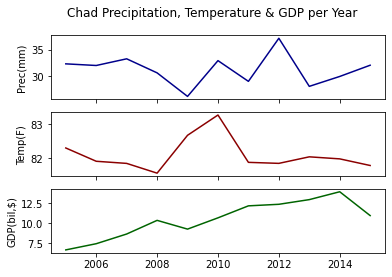

In [14]:
# Create Chad Leone charts for Temperature & Precipitations vs GDP
chad_df = agricultural_df[agricultural_df["ISO3"] == "TCD"]
x_values = chad_df["Year"]
y1_values = chad_df["Rainfall_mm"]
y2_values = chad_df["Temp_Farenheit"]
y3_values = chad_df["GDP_bd"]

fig = plt.figure(figsize=(15,5))


fig, axs = plt.subplots(3, sharex=True, sharey=False)
fig.suptitle('Chad Precipitation, Temperature & GDP per Year')
axs[0].plot(x_values, y1_values, color='DarkBlue')
axs[1].plot(x_values, y2_values, color='DarkRed')
axs[2].plot(x_values, y3_values, color='DarkGreen')
axs[0].set_ylabel('Prec(mm)')
axs[1].set_ylabel('Temp(F)')
axs[2].set_ylabel('GDP(bil,$)')